##Package imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/266Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

## Data Setup & Analysis

In [ ]:
data = pd.read_csv(path+'final_quotes.csv')

In [ ]:
data = data.dropna()
data.shape

(2579864, 3)

In [ ]:
data.head()

,quote,auth,tags
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,best
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,life
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,love
3,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,misattributed marilyn monroe
4,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,mistakes


###Basic Data Exploration

In [ ]:
print("Unique tags:", data['tags'].nunique())
print("Unique quotes:", data['quote'].nunique())
print("Unique tags:", data['quote'].nunique()/data['tags'].nunique())

Unique tags: 41290
Unique quotes: 682744
Unique tags: 16.535335432308067


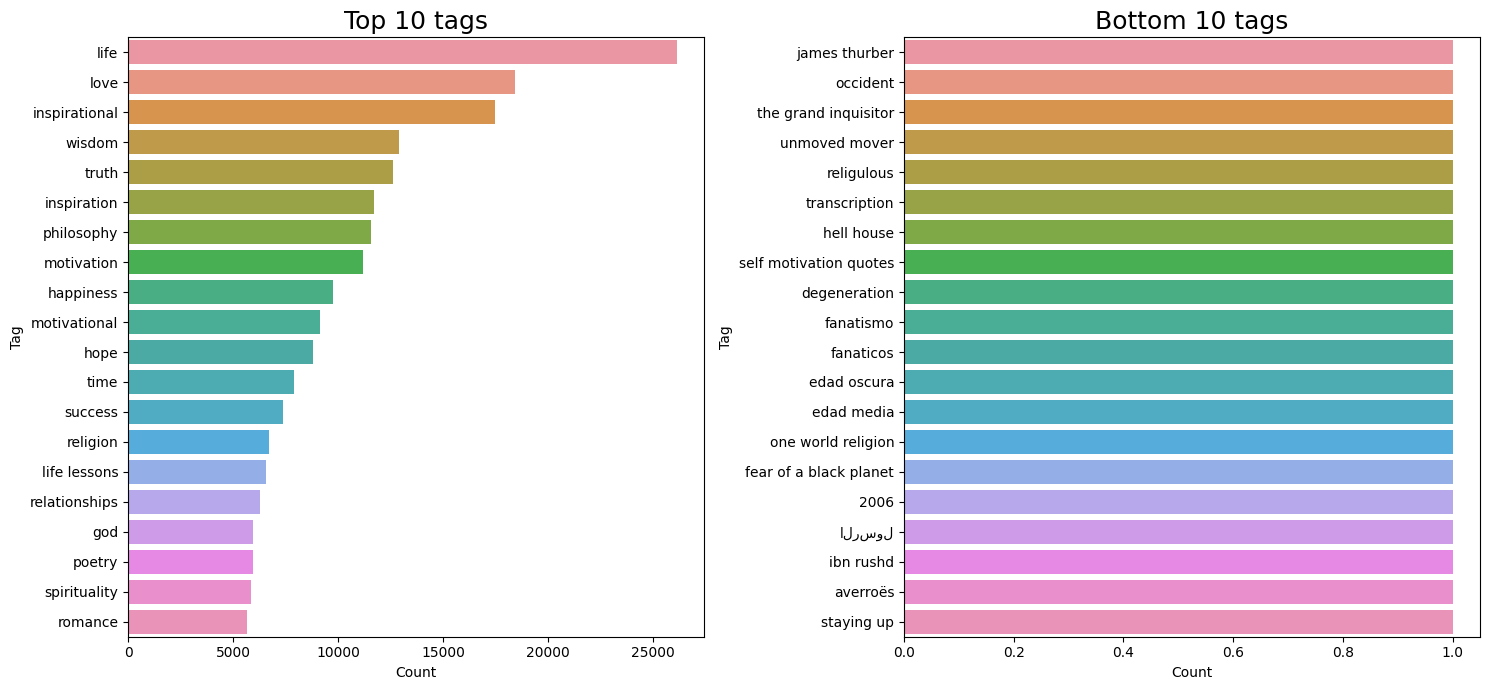

In [ ]:
# display top & bottom 10 tags by number of quotes

fig, axs = plt.subplots(1,2, figsize=(15, 7))

sns.barplot(data.tags.value_counts().reset_index()[:20], x='tags', y='index', ax=axs[0])
l_tags = list(data.tags.value_counts().reset_index()[:20]['index'])
axs[0].set_yticks(np.arange(20),l_tags)
axs[0].set_ylabel('Tag')
axs[0].set_xlabel('Count')
axs[0].set_title('Top 10 tags', fontsize=18)

sns.barplot(data.tags.value_counts().reset_index()[-20:], x='tags', y='index', ax=axs[1])
l_tags = list(data.tags.value_counts().reset_index()[-20:]['index'])
axs[1].set_yticks(np.arange(20),l_tags)
axs[1].set_ylabel('Tag')
axs[1].set_xlabel('Count')
axs[1].set_title('Bottom 10 tags', fontsize=18)

plt.tight_layout();

In [ ]:
# Creating 'length' feature

data['quote_length'] = data['quote'].str.len()
data.head()

,quote,auth,tags,quote_length
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,best,202.0
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,life,202.0
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,love,202.0
3,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,misattributed marilyn monroe,202.0
4,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,mistakes,202.0


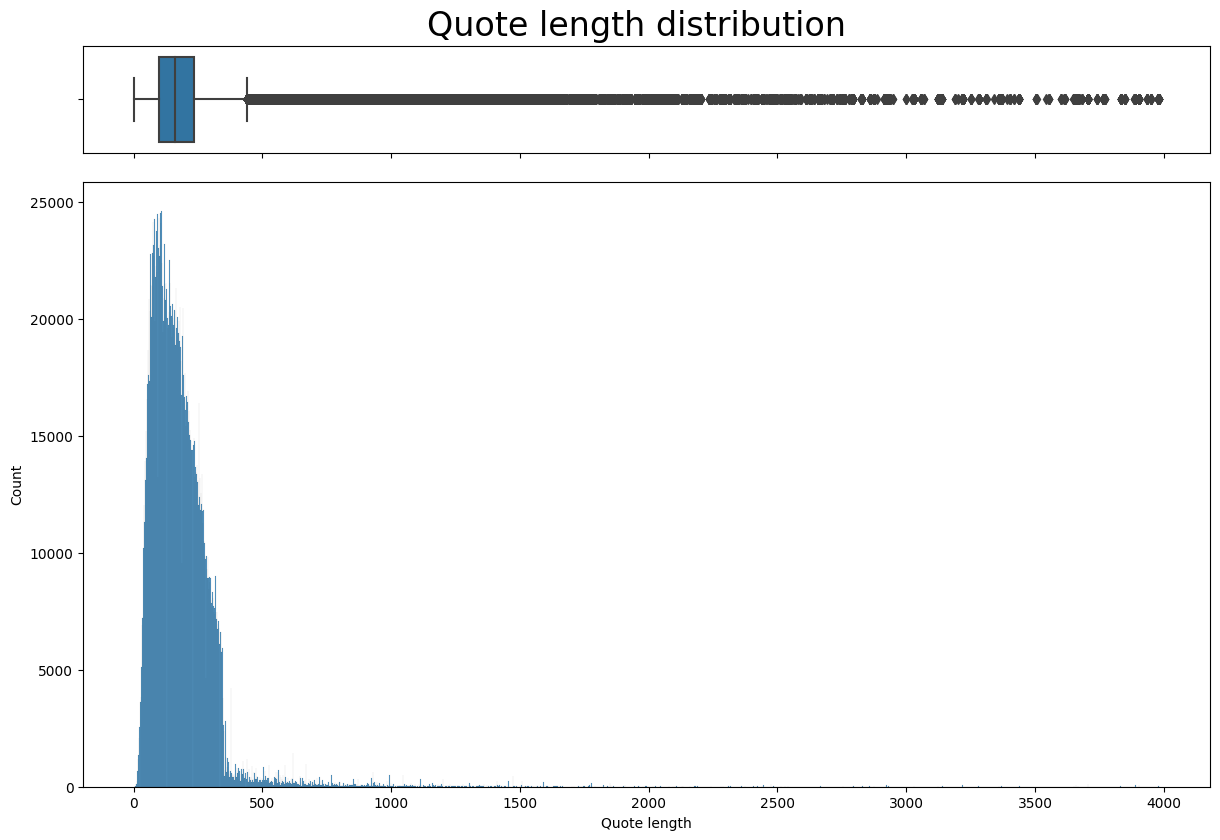

In [ ]:
# creating a figure

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f.set_figheight(8)
f.set_figwidth(12)
f.tight_layout()
f.suptitle('Quote length distribution', y=1.02, fontsize=24)

# assigning a graph to each axis

sns.boxplot(x=data["quote_length"], ax=ax_box, )
sns.histplot(data=data, x="quote_length", ax=ax_hist)
ax_hist.set_xlabel('Quote length')
ax_box.set_xlabel('')

plt.show()

In [ ]:
# descriptive statistics of the quote length values distribution
data['quote_length'].describe()

count    2.596555e+06
mean     1.842709e+02
std      1.574812e+02
min      3.000000e+00
25%      9.900000e+01
50%      1.600000e+02
75%      2.350000e+02
max      3.982000e+03
Name: quote_length, dtype: float64

In [ ]:
# Calculating the upper and lower whiskers of the boxplot displayed above

median = np.median(data['quote_length'])
upper_quartile = np.percentile(data['quote_length'], 75)
lower_quartile = np.percentile(data['quote_length'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data.quote_length[data['quote_length']<=upper_quartile+1.5*iqr].max()
lower_whisker = data.quote_length[data['quote_length']>=lower_quartile-1.5*iqr].min()

print(f"The uppwer whisker value is: {upper_whisker}\nThe lower whisker value is: {lower_whisker}")

The uppwer whisker value is: nan
The lower whisker value is: nan


###Quote Length

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
#prep df to plot quote length
quote = data[['quote']].drop_duplicates().dropna()

In [ ]:
#tokenize the quotes to plot quote length
tokenizer = RegexpTokenizer(r'\w+')
quote_text = '. '.join(quote['quote'])
quote_words = tokenizer.tokenize(quote_text)
quote_sentences = quote_text.replace(",", ".").replace("?", ".").replace("!", ".").split(".")
sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in quote_sentences]
sent_len = [i for i in sent_lenghs if i!=0]

In [ ]:
quote_text[0:100]

"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard"

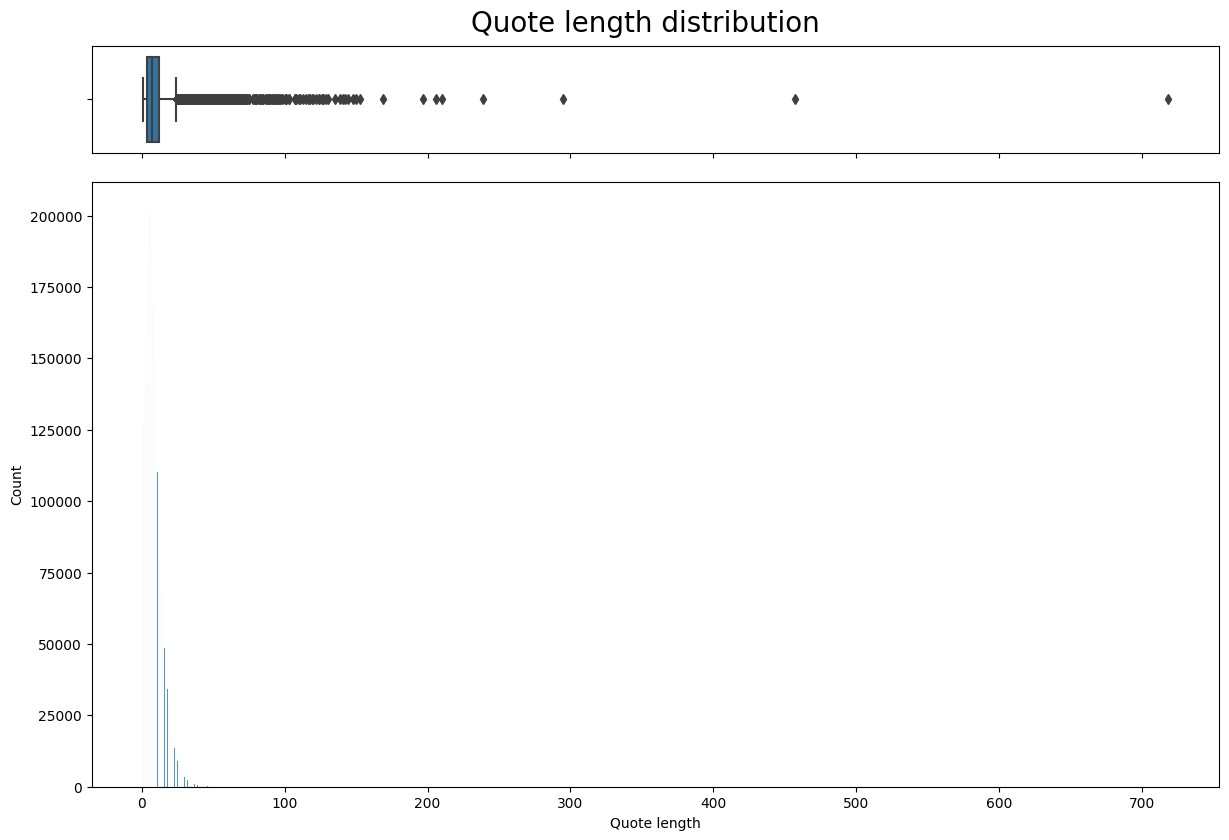

In [ ]:
#plot the length of quote
# plt.hist(sent_len, bins=range(min(sent_len), max(sent_len) + 1, 1),
#               alpha=0.4, color="blue", density=True)
# plt.xlabel("Length of quote")
# plt.ylabel("%Quotes")
# plt.title("Typical length of quote in the training data")


# creating a figure

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f.set_figheight(8)
f.set_figwidth(12)
f.tight_layout()
f.suptitle('Quote length distribution', y=1.02, fontsize=20)

# assigning a graph to each axis

sns.boxplot(x=sent_len, ax=ax_box, )
sns.histplot(data=sent_len, x=sent_len, ax=ax_hist)
ax_hist.set_xlabel('Quote length')
ax_box.set_xlabel('')

plt.show()

In [ ]:
# Calculating the upper and lower whiskers of the boxplot displayed above

median = np.median(sent_len)
upper_quartile = np.percentile(sent_len, 75)
lower_quartile = np.percentile(sent_len, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data.quote_length[data['quote_length']<=upper_quartile+1.5*iqr].max()
lower_whisker = data.quote_length[data['quote_length']>=lower_quartile-1.5*iqr].min()

print(f"The uppwer whisker value is: {upper_whisker}\nThe lower whisker value is: {lower_whisker}")

The uppwer whisker value is: 24
The lower whisker value is: 3
